In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EGDI

In [19]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [20]:
egdi = egdi.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

EGOV

In [21]:
egov = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Government Index',
    var_name='Metric',
    value_name='EGOV'
)

In [22]:
egov = egov.iloc[:, [0, 2]]

LIST

In [23]:
countries = egdi['Country Name'].tolist()

PIB PER CAPITA PPC

In [24]:
pib = pd.read_csv('updated_wb_gdp_percapita_ppc.csv')

In [25]:
pib = pib.melt(
    id_vars='Country Name',
    value_vars='2024',
    var_name='Ano',
    value_name='PIB'
)

In [26]:
pib = pib[pib['Country Name'].isin(countries)]

In [27]:
pib = pib.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [28]:
pib = pib.fillna(0.0)

In [29]:
pib = pib.iloc[:, [0, 2]]

DISPERSÃO

In [30]:
egov_pib = egov.copy()

In [31]:
egov_pib['Produto Interno Bruto'] = pib['PIB']

In [32]:
egov_pib = egov_pib.rename(columns={'EGOV': 'E-Government Development Index'})

In [33]:
egov_pib = egov_pib.iloc[:, [1, 2]]

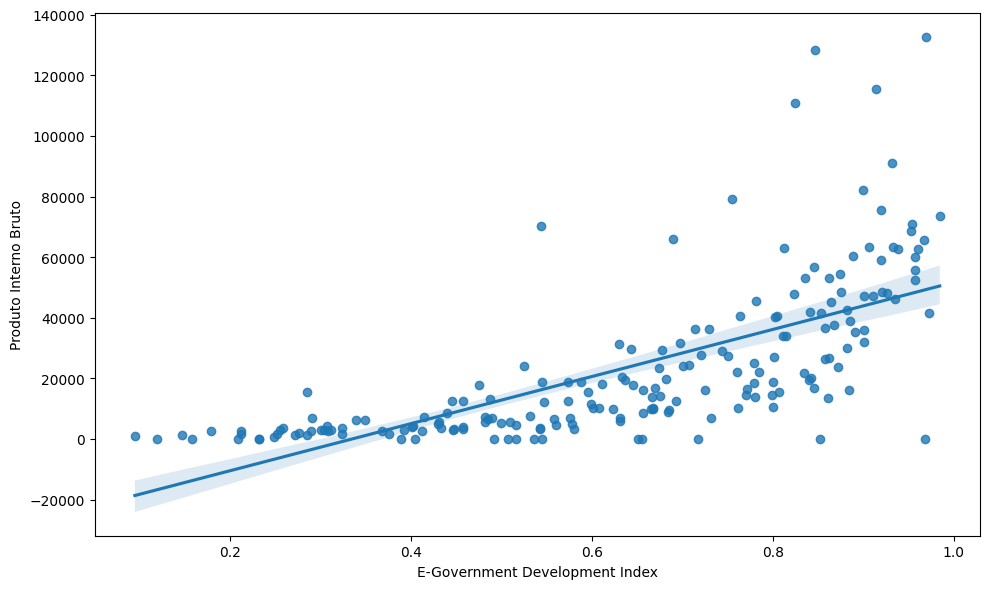

In [34]:
plt.figure(figsize=(10, 6))

sns.regplot(data=egov_pib, x='E-Government Development Index', y='Produto Interno Bruto')

plt.tight_layout()
plt.show()